# (CIFAR-10) USING CNNs Daniel Coelho



- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html




```

```

# STEP #1: IMPORT LIBRARIES/DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

2024-02-05 11:26:26.051875: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[2]


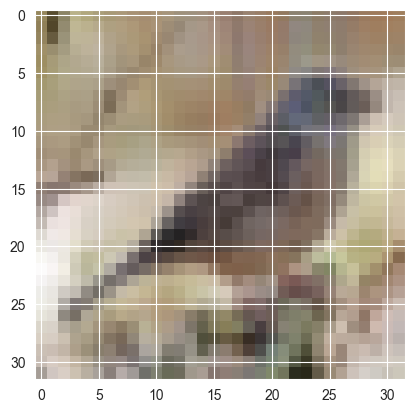

In [7]:
i = 10018
plt.imshow(X_train[i])
print(y_train[i])

# STEP #3: DATA PREPARATION

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

number_cat = 10

In [9]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [12]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [15]:
X_train.shape

(50000, 32, 32, 3)

In [16]:
Input_shape = X_train.shape[1:]

# STEP #4: TRAIN THE MODEL

In [17]:
from keras.models import Sequential
from keras. layers import Conv2D, MaxPooling2D,Dense, Flatten, Dropout
from keras.optimizers import Adam

In [18]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout (0.4))
model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

In [19]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=40, epochs=15, shuffle=True)

Epoch 1/15
1250/1250 [==============================] - 96s 75ms/step - loss: 1.5297 - accuracy: 0.4459
Epoch 2/15
1250/1250 [==============================] - 88s 70ms/step - loss: 1.1941 - accuracy: 0.5738
Epoch 3/15
1250/1250 [==============================] - 82s 66ms/step - loss: 1.0538 - accuracy: 0.6289
Epoch 4/15
1229/1250 [============================>.] - ETA: 1s - loss: 0.9459 - accuracy: 0.6690

# STEP #5: EVALUATE THE MODEL

In [ ]:
evaluation = model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))